# CSE 252A Computer Vision I Fall 2018 - Assignment 4

### Instructor: David Kriegman
### Assignment Published On: Tuesday, November 27, 2018
### Due On: Friday, December 7, 2018 11:59 pm

## Instructions
* Review the academic integrity and collaboration policies on the course website.
* This assignment must be completed individually.
* Programming aspects of this assignment must be completed using Python in this notebook.
* If you want to modify the skeleton code, you can do so. This has been provided just to provide you with a framework for the solution.
* You may use python packages for basic linear algebra (you can use numpy or scipy for basic operations), but you may not use packages that directly solve the problem.
* If you are unsure about using a specific package or function, then ask the instructor and teaching assistants for clarification.
* You must submit this notebook exported as a pdf. You must also submit this notebook as .ipynb file.
* You must submit both files (.pdf and .ipynb) on Gradescope. You must mark each problem on Gradescope in the pdf.
* **Late policy** - 10% per day late penalty after due date up to 3 days.

## Problem 1: Optical Flow [10 pts]

In this problem, the single scale Lucas-Kanade method for estimating optical flow will be implemented, and the data needed for this problem can be found in the folder 'optical_flow_images'.

An example optical flow output is shown below - this is not a solution, just an example output.

![title](optical_flow_images/sample_optical_flow_output.PNG)

### Part 1: Lucas-Kanade implementation [5 pts]

Implement the Lucas-Kanade method for estimating optical flow. The function 'LucasKanade' needs to be completed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d as conv2

def grayscale(img):
    '''
    Converts RGB image to Grayscale
    '''
    gray=np.zeros((img.shape[0],img.shape[1]))
    gray=img[:,:,0]*0.2989+img[:,:,1]*0.5870+img[:,:,2]*0.1140
    return gray

def plot_optical_flow(img,U,V):
    '''
    Plots optical flow given U,V and one of the images
    '''
    
    # Change t if required, affects the number of arrows
    # t should be between 1 and min(U.shape[0],U.shape[1])
    t=10 
    
    # Subsample U and V to get visually pleasing output
    U1 = U[::t,::t]
    V1 = V[::t,::t]
    
    # Create meshgrid of subsampled coordinates
    r, c = img.shape[0],img.shape[1]
    cols,rows = np.meshgrid(np.linspace(0,c-1,c), np.linspace(0,r-1,r))
    cols = cols[::t,::t]
    rows = rows[::t,::t]
    
    # Plot optical flow
    plt.figure(figsize=(8,8))
    plt.imshow(img)
    plt.quiver(cols,rows,U1,V1)
    plt.show()

images=[]
for i in range(1,5):
    images.append(plt.imread('optical_flow_images/im'+str(i)+'.png'))

In [2]:
import sys

def LucasKanade(im1,im2,windowSize):
    '''
    Inputs: the two images and window size
    Return U,V
    '''
    # compute gradient in x and y direction 
    image_dy , image_dx = np.gradient(im1)
    image_dt = im2 - im1
    
    U = np.zeros(im1.shape)
    V = np.zeros(im1.shape)

    assert(im1.shape == im2.shape)
    for i in range(0, im1.shape[0]):
        for j in range(0, im1.shape[1]):
            start_i, end_i = i-windowSize//2, i+windowSize//2
            start_j, end_j = j-windowSize//2, j+windowSize//2
            start_i = 0 if start_i <0 else start_i
            start_j = 0 if start_j <0 else start_j
            end_i = im1.shape[0] if end_i > im1.shape[0] else end_i
            end_j = im1.shape[1] if end_j > im1.shape[1] else end_j
            
            i_x_patch = image_dx[start_i: end_i+1, start_j: end_j+1]
            i_y_patch = image_dy[start_i: end_i+1, start_j: end_j+1]
            i_t_patch = image_dt[start_i: end_i+1, start_j: end_j+1]
            assert(i_x_patch.shape == i_y_patch.shape == i_t_patch.shape)
            
            ix2 = np.sum(i_x_patch * i_x_patch)
            iy2 = np.sum(i_y_patch * i_y_patch)
            ixy = np.sum(i_x_patch * i_y_patch)
            
            # Create M matrix
            M = np.array([[ix2, ixy], [ixy, iy2]])
            # Create b matrix
            ixt = np.sum(i_x_patch * i_t_patch)
            iyt = np.sum(i_y_patch * i_t_patch)
            b = np.array([[-ixt, -iyt]])
            UV = np.dot(np.linalg.pinv(M), b.T)
            
            # Find U and V vector
            U[i, j] = UV[0]
            V[i, j] = UV[1]
    
    return U,V

### Part 2: Window size [2 pts]

Plot optical flow for the pair of images im1 and im2 for at least 3 different window sizes which leads to observable difference in the results. Comment on the effect of window size on results and justify.

Window size: 5


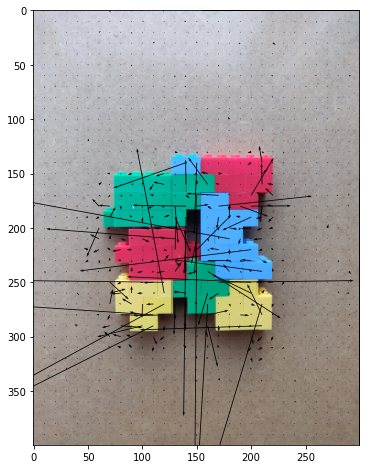

Window size: 15


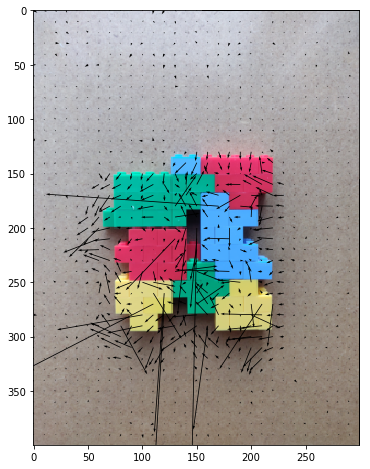

Window size: 25


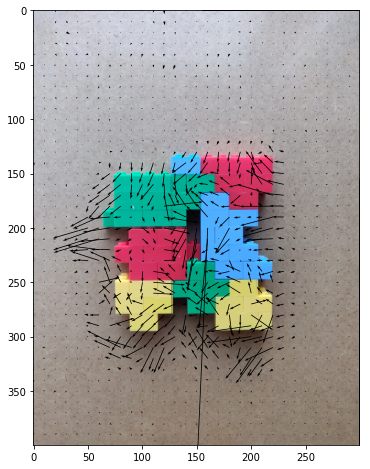

In [3]:
window=[5, 15, 25]
for w in window: 
    print("Window size: {}".format(w))
    U, V = LucasKanade(grayscale(images[0]), grayscale(images[1]), w)
    plot_optical_flow(images[0],U,V)

### Part 3: All pairs [3 pts]

Find optical flow for the pairs (im1,im2), (im1,im3), (im1,im4) using a good window size. Does the optical flow result seem consistent with visual inspection? Comment on the type of motion indicated by results and visual inspection and explain why they might be consistent or inconsistent.

Optical Flow for im1 and im2


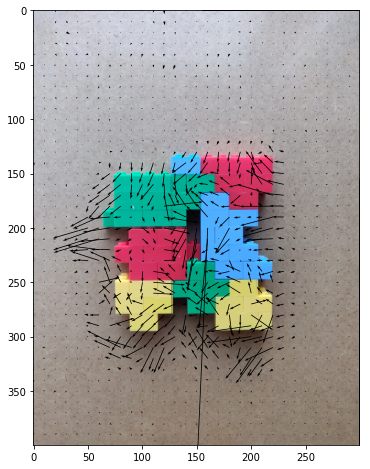

Optical Flow for im1 and im3


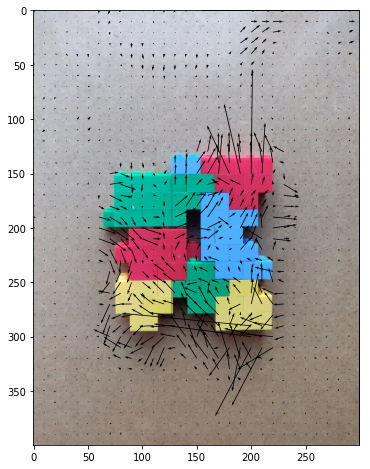

Optical Flow for im1 and im4


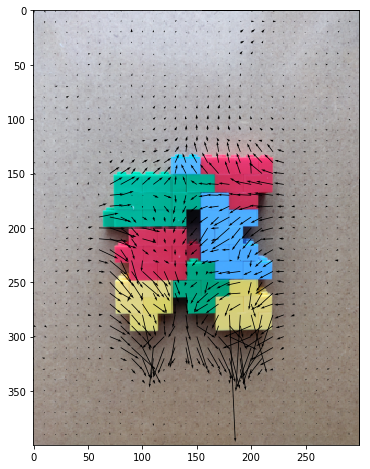

In [4]:
# im1 and im2
print("Optical Flow for im1 and im2")
window=25
U, V = LucasKanade(grayscale(images[0]), grayscale(images[1]), window)
plot_optical_flow(images[0],U,V)

# im1 and im3
print("Optical Flow for im1 and im3")
window=25
U, V = LucasKanade(grayscale(images[0]), grayscale(images[2]), window)
plot_optical_flow(images[0],U,V)

# im1 and im4
print("Optical Flow for im1 and im4")
window=25
U, V = LucasKanade(grayscale(images[0]), grayscale(images[3]), window)
plot_optical_flow(images[0],U,V)

Yes, the visual flow result seems consistent with the visual inspection. For example, the flow result of img1, img2-show the flow towards left which can be verified by visual inspection. Similarly, for image pair img1, img3- rotation can be seen through optical flow arrows. Also, for img1, img4 pair , zoom out effect can be observed with flow arrows going down. Result is consistent mostly with pairs (img1, img2) and (im1, img4) since they have linear motion and optical flow algorithm assumption of constant flow in a given patch holds well but it looks less consistent with pair (im1, img3), since it's rotation which is a complicated motion and optical flow assumption doesn't hold very accurate in this case.

## Problem 2: Machine Learning [12 pts]

In this problem, you will implement several machine learning solutions for computer vision problems.

### Part 1: Initial setup [1 pts]

Follow the directions on https://www.tensorflow.org/install/ to install Tensorflow on your computer.
If you are using the Anaconda distribution for python, you can check out https://www.anaconda.com/blog/developer-blog/tensorflow-in-anaconda/.

Note: You will not need GPU support for this assignment so don't worry if you don't have one. Furthermore, installing with GPU support is often more difficult to configure so it is suggested that you install the CPU only version.

Run the tensorflow hello world snippet below to verify your instalation.

Download the MNIST data from http://yann.lecun.com/exdb/mnist/.

Download the 4 zipped files, extract them into one folder, and change the variable 'path' in the code below. (Code taken from https://gist.github.com/akesling/5358964 )

Plot one random example image corresponding to each label from training data.

In [5]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

/home/amanraj/anaconda3/envs/neural/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


b'Hello, TensorFlow!'


In [6]:
import os
import struct

# Change path as required
path = "./mnist_data/"

def read(dataset = "training", datatype='images'):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels-idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)
    
    if(datatype=='images'):
        get_data = lambda idx: img[idx]
    elif(datatype=='labels'):
        get_data = lambda idx: lbl[idx]

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_data(i)
        
trainData=np.array(list(read('training','images')))
trainLabels=np.array(list(read('training','labels')))
testData=np.array(list(read('testing','images')))
testLabels=np.array(list(read('testing','labels')))

Some helper functions are given below.

Label: 5


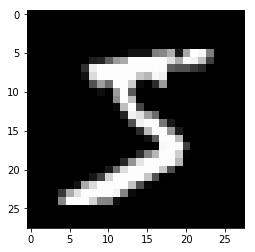

Label: 0


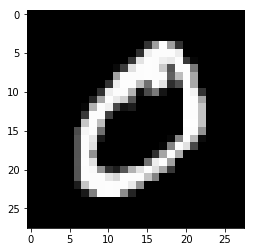

Label: 4


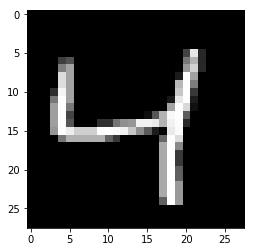

Label: 1


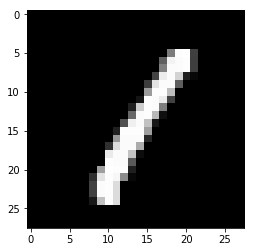

Label: 9


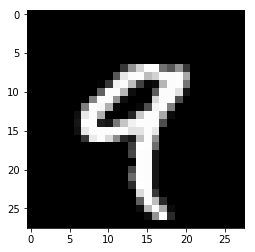

Label: 2


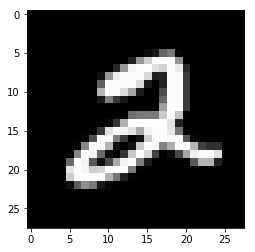

Label: 3


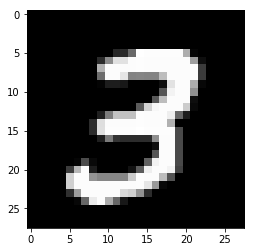

Label: 6


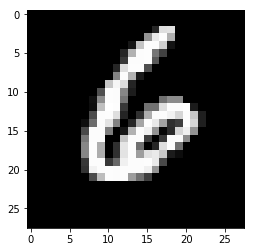

Label: 7


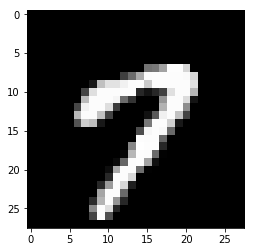

Label: 8


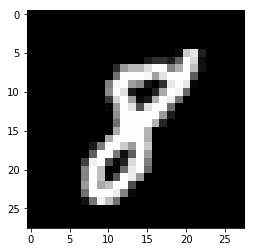

In [7]:
# Plot random example from each label
shown_labels = []
for i in range(0, trainData.shape[0]):
    if len(shown_labels) == 10:
        break
    if trainLabels[i] not in shown_labels:
        shown_labels.append(trainLabels[i])
        print("Label: {}".format(trainLabels[i]))
        plt.imshow(trainData[i], cmap='gray')
        plt.show()

In [8]:
# a generator for batches of data
# yields data (batchsize, 3, 32, 32) and labels (batchsize)
# if shuffle, it will load batches in a random order
def DataBatch(data, label, batchsize, shuffle=True):
    n = data.shape[0]
    if shuffle:
        index = np.random.permutation(n)
    else:
        index = np.arange(n)
    for i in range(int(np.ceil(n/batchsize))):
        inds = index[i*batchsize : min(n,(i+1)*batchsize)]
        yield data[inds], label[inds]

# tests the accuracy of a classifier
def test(testData, testLabels, classifier):
    batchsize=50
    correct=0.
    for data,label in DataBatch(testData,testLabels,batchsize,shuffle=False):
        prediction = classifier(data)
        correct += np.sum(prediction==label)
    return correct/testData.shape[0]*100

# a sample classifier
# given an input it outputs a random class
class RandomClassifier():
    def __init__(self, classes=10):
        self.classes=classes
    def __call__(self, x):
        return np.random.randint(self.classes, size=x.shape[0])

randomClassifier = RandomClassifier()
print('Random classifier accuracy: %f' % 
      test(testData, testLabels, randomClassifier))

Random classifier accuracy: 9.430000


### Part 2: Confusion Matrix [2 pts]
Here you will implement a function that computes the confusion matrix for a classifier.
The matrix (M) should be nxn where n is the number of classes.
Entry M[i,j] should contain the fraction of images of class i that was classified as class j.

200it [00:00, 26749.39it/s]


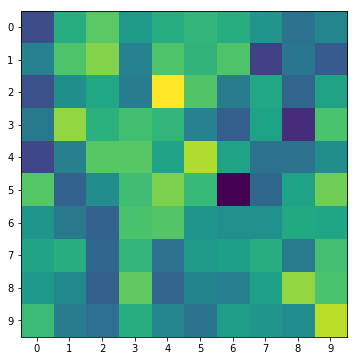

[[0.08 0.1  0.11 0.1  0.1  0.11 0.1  0.1  0.09 0.1 ]
 [0.1  0.11 0.11 0.1  0.11 0.11 0.11 0.08 0.09 0.09]
 [0.09 0.1  0.1  0.09 0.12 0.11 0.09 0.1  0.09 0.1 ]
 [0.09 0.11 0.1  0.11 0.11 0.1  0.09 0.1  0.08 0.11]
 [0.08 0.09 0.11 0.11 0.1  0.12 0.1  0.09 0.09 0.1 ]
 [0.11 0.09 0.1  0.11 0.11 0.11 0.07 0.09 0.1  0.11]
 [0.1  0.09 0.09 0.11 0.11 0.1  0.1  0.1  0.1  0.1 ]
 [0.1  0.1  0.09 0.11 0.09 0.1  0.1  0.1  0.09 0.11]
 [0.1  0.1  0.09 0.11 0.09 0.1  0.09 0.1  0.11 0.11]
 [0.11 0.09 0.09 0.1  0.1  0.09 0.1  0.1  0.1  0.12]]


In [9]:
# Using the tqdm module to visualize run time is suggested
from tqdm import tqdm

# It would be a good idea to return the accuracy, along with the confusion 
# matrix, since both can be calculated in one iteration over test data, to 
# save time
def Confusion(testData, testLabels, classifier):
    # we have 10 number of classes
    n_classes = 10
    batchsize = 50
    confusion_matrix = np.zeros((n_classes, n_classes))
    perclass_acc = {str(i):0 for i in range(n_classes)}
    
    for data, label in tqdm(DataBatch(testData, testLabels, batchsize, shuffle=False)):
        pred_label = classifier(data)
        for b in range(batchsize):
            confusion_matrix[label[b]][pred_label[b]] += 1
    
    # create confusion matrix
    for i in range(n_classes):
        confusion_matrix[i] = confusion_matrix[i] / np.sum(confusion_matrix[i])
    
    return confusion_matrix

def VisualizeConfusion(M):
    classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    plt.figure(figsize=(14, 6))
    plt.imshow(M)
    plt.xticks(classes, classes)
    plt.yticks(classes, classes)
    plt.show()
    print(np.round(M,2))

M = Confusion(testData, testLabels, randomClassifier)
VisualizeConfusion(M)

### Part 3: K-Nearest Neighbors (KNN) [4 pts]

* Here you will implement a simple knn classifier. The distance metric is Euclidean in pixel space. k refers to the number of neighbors involved in voting on the class, and should be 3. You are allowed to use sklearn.neighbors.KNeighborsClassifier.
* Display confusion matrix and accuracy for your KNN classifier trained on the entire train set. (should be ~97 %)
* After evaluating the classifier on the testset, based on the confusion matrix, mention the number that the number '4' is most often predicted to be, other than '4'.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
class KNNClassifer():
    def __init__(self, k=3):
        # k is the number of neighbors involved in voting
        self.classifier = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
        
    def train(self, trainData, trainLabels):
        trainData = trainData.reshape(
            trainData.shape[0], trainData.shape[1]*trainData.shape[2])
        self.classifier.fit(trainData, trainLabels)
        
    def __call__(self, x):
        # this method should take a batch of images
        # and return a batch of predictions
        x = x.reshape(x.shape[0], x.shape[1]*x.shape[2])

        return self.classifier.predict(x)

# test your classifier with only the first 100 training examples (use this
# while debugging)
# note you should get ~ 65 % accuracy
knnClassiferX = KNNClassifer()
knnClassiferX.train(trainData[:100], trainLabels[:100])
print ('KNN classifier accuracy: %f'%test(testData, testLabels, knnClassiferX))

KNN classifier accuracy: 64.760000


In [11]:
# test your classifier with all the training examples (This may take a while)
knnClassifer = KNNClassifer()
knnClassifer.train(trainData, trainLabels)
print ('KNN classifier accuracy: %f'%test(testData, testLabels, knnClassifer))

KNN classifier accuracy: 97.050000


200it [09:08,  2.75s/it]


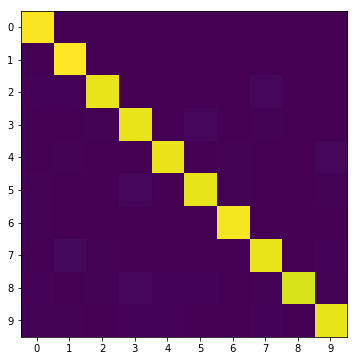

[[0.99 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.01 0.01 0.97 0.   0.   0.   0.   0.01 0.   0.  ]
 [0.   0.   0.   0.97 0.   0.01 0.   0.01 0.   0.  ]
 [0.   0.01 0.   0.   0.97 0.   0.   0.   0.   0.02]
 [0.01 0.   0.   0.01 0.   0.96 0.01 0.   0.   0.  ]
 [0.01 0.   0.   0.   0.   0.   0.99 0.   0.   0.  ]
 [0.   0.02 0.   0.   0.   0.   0.   0.96 0.   0.01]
 [0.01 0.   0.   0.02 0.01 0.01 0.   0.   0.94 0.  ]
 [0.   0.   0.   0.01 0.01 0.   0.   0.01 0.   0.96]]


In [12]:
# display confusion matrix for your KNN classifier with all the training examples
M = Confusion(testData, testLabels, knnClassifer)
VisualizeConfusion(M)

After looking at confusion matrix we can conclude that, the number '4' is most often predicted to be number '9', other than '4'.

### Part 4: Principal Component Analysis (PCA) K-Nearest Neighbors (KNN) [5 pts]
Here you will implement a simple KNN classifer in PCA space (for k=3 and 25 principal components).
You should implement PCA yourself using svd (you may not use sklearn.decomposition.PCA
or any other package that directly implements PCA transformations

Is the testing time for PCA KNN classifier more or less than that for KNN classifier? Comment on why it differs if it does.

In [13]:
class PCAKNNClassifier():
    def __init__(self, components=25, k=3):
        # components = number of principal components
        # k is the number of neighbors involved in voting
        self.components = components
        self.k = k
        self.classifier = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
       
        
    def train(self, trainData, trainLabels):
        trainData = trainData.reshape(
            trainData.shape[0], trainData.shape[1]*trainData.shape[2])
        # find covariance matrix 
        covX = np.cov(trainData.T)
        # apply SVD
        S, U, V = np.linalg.svd(covX)
        # calculate projection matrix
        self.proj_W = V[:self.components].T
        trainData_proj = np.dot(trainData, self.proj_W)
        self.classifier.fit(trainData_proj, trainLabels)
        
        
    def __call__(self, x):
        # this method should take a batch of images
        # and return a batch of predictions
        x = x.reshape(x.shape[0], x.shape[1]*x.shape[2])
        x_pca = np.dot(x, self.proj_W)

        return self.classifier.predict(x_pca)

# test your classifier with only the first 100 training examples (use this
# while debugging)
pcaknnClassifierX = PCAKNNClassifier()
pcaknnClassifierX.train(trainData[:100], trainLabels[:100])
print ('PCA-KNN classifier accuracy: %f'%test(testData, testLabels, pcaknnClassifierX))

PCA-KNN classifier accuracy: 66.160000


In [14]:
# test your classifier with all the training examples (This may take a while)
pcaknnClassifier = PCAKNNClassifier()
pcaknnClassifier.train(trainData, trainLabels)
print ('PCA-KNN classifier accuracy: %f'%test(testData, testLabels, pcaknnClassifier))

PCA-KNN classifier accuracy: 97.310000


200it [00:06, 30.27it/s]


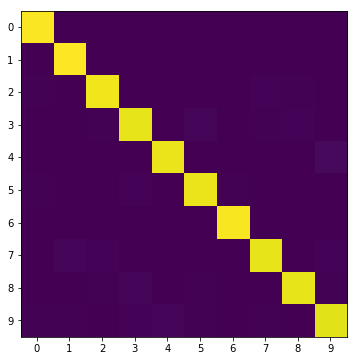

[[0.99 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.98 0.   0.   0.   0.   0.01 0.   0.  ]
 [0.   0.   0.   0.96 0.   0.01 0.   0.01 0.01 0.  ]
 [0.   0.   0.   0.   0.97 0.   0.   0.   0.   0.03]
 [0.01 0.   0.   0.01 0.   0.97 0.01 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.99 0.   0.   0.  ]
 [0.   0.02 0.01 0.   0.   0.   0.   0.96 0.   0.01]
 [0.   0.   0.   0.02 0.   0.01 0.   0.   0.96 0.  ]
 [0.   0.01 0.   0.01 0.01 0.   0.   0.   0.   0.95]]


In [15]:
# display confusion matrix for your KNN classifier with all the training examples
M = Confusion(testData, testLabels, pcaknnClassifier)
VisualizeConfusion(M)

**Is the testing time for PCA KNN classifier more or less than that for KNN classifier?** 

Testing time for PCA-KNN classifier is very less compared to KNN classifier. This is because in case of PCA-KNN , PCA reduces the dimension of data point, so inference as well as training is fast as less computation is done compared to simple KNN.

## Problem 3: Deep learning [12 pts]
Below is some helper code to train your deep networks. You can look at https://www.tensorflow.org/get_started/mnist/beginners for reference.

In [16]:
# base class for your Tensorflow networks. It implements the training loop
# (train) and prediction(__call__)  for you.
# You will need to implement the __init__ function to define the networks
# structures in the following problems.

class TFClassifier():
    def __init__(self):
        pass
    
    def train(self, trainData, trainLabels, epochs=1, batchsize=50):
        self.prediction = tf.argmax(self.y,1)
        self.cross_entropy = tf.reduce_mean(
            tf.nn.sparse_softmax_cross_entropy_with_logits(labels=self.y_, logits=self.y))
        self.train_step = tf.train.AdamOptimizer(1e-3).minimize(self.cross_entropy)
        self.correct_prediction = tf.equal(self.prediction, self.y_)
        self.accuracy = tf.reduce_mean(tf.cast(self.correct_prediction, tf.float32))
        self.sess.run(tf.global_variables_initializer())
        
        for epoch in range(epochs):
            for i, (data,label) in enumerate(DataBatch(trainData, trainLabels, batchsize, shuffle=True)):
                data=np.expand_dims(data,-1)
                _, acc = self.sess.run(
                    [self.train_step, self.accuracy], feed_dict={self.x: data, self.y_: label})
                
            print ('Epoch:%d Accuracy: %f'%(epoch+1, test(testData, testLabels, self)))
            
    def __call__(self, x):
        return self.sess.run(self.prediction, feed_dict={self.x: np.expand_dims(x,-1)})
    
    def get_first_layer_weights(self):
        return self.sess.run(self.weights[0])

# helper function to get weight variable
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.01)
    return tf.Variable(initial)

# helper function to get bias variable
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

# example linear classifier
class LinearClassifier(TFClassifier):
    def __init__(self, classes=10):
        self.sess = tf.Session()
        # input batch of images
        self.x = tf.placeholder(tf.float32, shape=[None,28,28,1]) 
        # input labels
        self.y_ = tf.placeholder(tf.int64, shape=[None]) 

        # model variables
        self.weights = [weight_variable([28*28,classes])]
        self.biases = [bias_variable([classes])]

        # linear operation
        self.y = tf.matmul(tf.reshape(self.x,(-1,28*28*1)),self.weights[0]) + self.biases[0]
        

# test the example linear classifier (note you should get around 90% accuracy
# for 10 epochs and batchsize 50)
linearClassifier = LinearClassifier()
linearClassifier.train(trainData/255., trainLabels, epochs=10)
print ('Single-layer Linear classifier accuracy: %f'%test(
    testData/255., testLabels, linearClassifier))

Epoch:1 Accuracy: 90.990000
Epoch:2 Accuracy: 91.310000
Epoch:3 Accuracy: 92.100000
Epoch:4 Accuracy: 91.830000
Epoch:5 Accuracy: 91.650000
Epoch:6 Accuracy: 91.550000
Epoch:7 Accuracy: 91.070000
Epoch:8 Accuracy: 91.000000
Epoch:9 Accuracy: 91.300000
Epoch:10 Accuracy: 90.980000
Single-layer Linear classifier accuracy: 92.750000


### Part 1: Single Layer Perceptron [2 pts]
The simple linear classifier implemented in the cell already performs quite well. Plot the filter weights corresponding to each output class (weights, not biases) as images. (Normalize weights to lie between 0 and 1 and use color maps like 'inferno' or 'plasma' for good results). Comment on what the weights look like and why that may be so.


Neural: 0


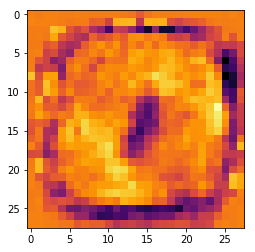

Neural: 1


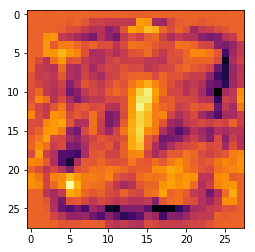

Neural: 2


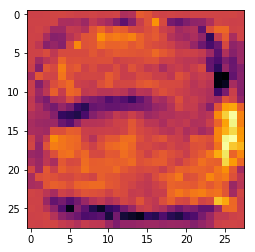

Neural: 3


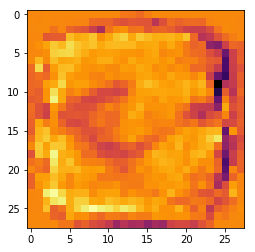

Neural: 4


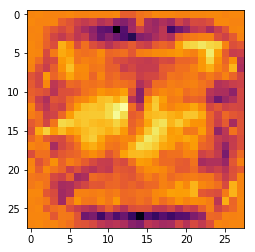

Neural: 5


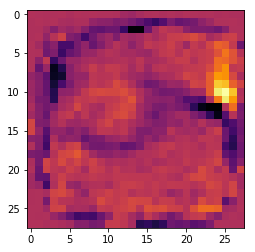

Neural: 6


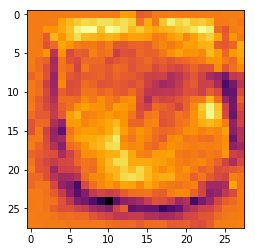

Neural: 7


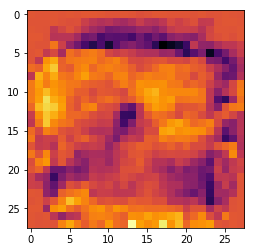

Neural: 8


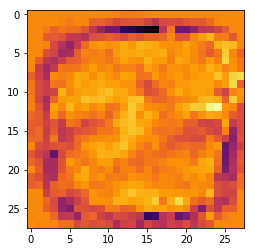

Neural: 9


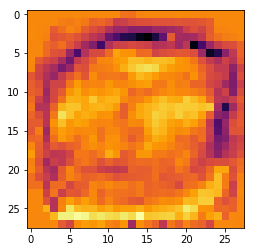

In [17]:
weights = linearClassifier.get_first_layer_weights()
for i in range(0,weights.shape[1]):
    print("Neural: {}".format(i))
    weight = weights[:, i]
    weight = (weight-weight.min())/(weight.max()-weight.min())
    plt.imshow(weight.reshape(28, 28), cmap='inferno')
    plt.show()

As we can see weights of corresponding neuron take the shape of actual number that it is going to predict because each specific neuron has learnt to give high activation when it encounters a certian number only.

### Part 2: Multi Layer Perceptron (MLP) [5 pts]
Here you will implement an MLP. The MLP shoud consist of 2 layers (matrix multiplication and bias offset) that map to the following feature dimensions:

* 28x28 -> hidden (100)
* hidden -> classes

* The hidden layer should be followed with a ReLU nonlinearity. The final layer should not have a nonlinearity applied as we desire the raw logits output.
* The final output of the computation graph should be stored in self.y as that will be used in the training.

Display the confusion matrix and accuracy after training. Note: You should get ~ 97 % accuracy for 10 epochs and batch size 50.

Plot the filter weights corresponding to the mapping from the inputs to the first 10 hidden layer outputs (out of 100). Do the weights look similar to the weights plotted in the previous problem? Why or why not?

In [18]:
class MLPClassifer(TFClassifier):
    def __init__(self, classes=10, hidden=100):
        self.sess = tf.Session()

        # input batch of images
        self.x = tf.placeholder(tf.float32, shape=[None,28,28,1]) 
        # input labels
        self.y_ = tf.placeholder(tf.int64, shape=[None]) 

        # model variables
        self.weights = [weight_variable([28*28,100]), weight_variable([100,classes])]
        self.biases = [bias_variable([100]), bias_variable([classes])]

        # linear operation
        layer1 = tf.matmul(tf.reshape(self.x,(-1,28*28*1)),self.weights[0]) + self.biases[0]
        self.y = tf.matmul(tf.nn.relu(layer1), self.weights[1]) + self.biases[1]

mlpClassifer = MLPClassifer()
mlpClassifer.train(trainData/255., trainLabels, epochs=10)
print ('Multi-layer classifier accuracy: %f'%test(testData/255., testLabels, mlpClassifer))

Epoch:1 Accuracy: 94.030000
Epoch:2 Accuracy: 95.580000
Epoch:3 Accuracy: 96.240000
Epoch:4 Accuracy: 97.190000
Epoch:5 Accuracy: 97.320000
Epoch:6 Accuracy: 97.370000
Epoch:7 Accuracy: 97.360000
Epoch:8 Accuracy: 97.550000
Epoch:9 Accuracy: 97.250000
Epoch:10 Accuracy: 97.350000
Multi-layer classifier accuracy: 97.500000


200it [09:08,  2.74s/it]


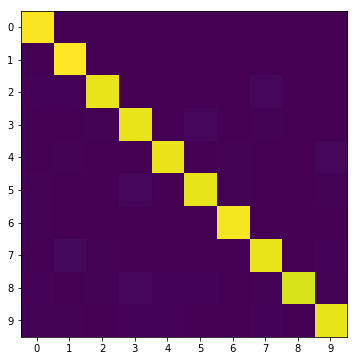

[[0.99 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.01 0.01 0.97 0.   0.   0.   0.   0.01 0.   0.  ]
 [0.   0.   0.   0.97 0.   0.01 0.   0.01 0.   0.  ]
 [0.   0.01 0.   0.   0.97 0.   0.   0.   0.   0.02]
 [0.01 0.   0.   0.01 0.   0.96 0.01 0.   0.   0.  ]
 [0.01 0.   0.   0.   0.   0.   0.99 0.   0.   0.  ]
 [0.   0.02 0.   0.   0.   0.   0.   0.96 0.   0.01]
 [0.01 0.   0.   0.02 0.01 0.01 0.   0.   0.94 0.  ]
 [0.   0.   0.   0.01 0.01 0.   0.   0.01 0.   0.96]]


In [19]:
# display confusion matrix for your classifier with all the training examples
M = Confusion(testData, testLabels, knnClassifer)
VisualizeConfusion(M)

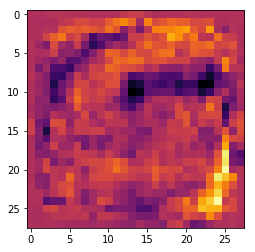

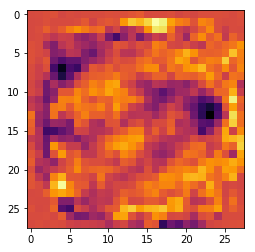

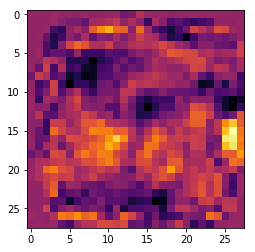

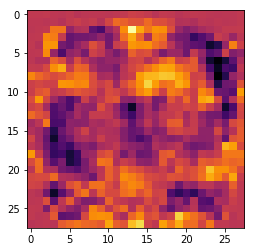

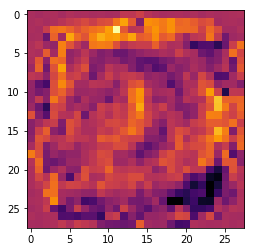

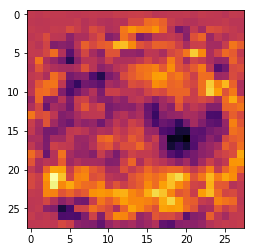

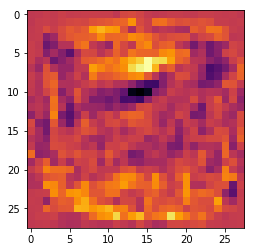

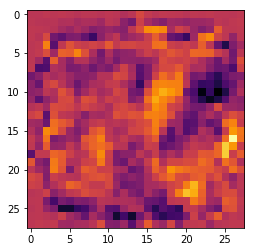

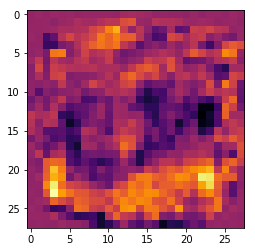

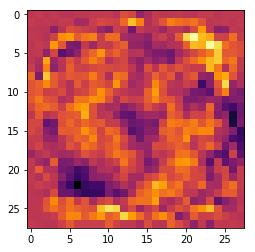

In [20]:
weights = mlpClassifer.get_first_layer_weights()
for i in range(10):
    weight = weights[:, i]
    weight = (weight-weight.min())/(weight.max()-weight.min())
    plt.imshow(weight.reshape(28, 28), cmap='inferno')
    plt.show()

**Do the weights look similar to the weights plotted in the previous problem? Why or why not?**

No, the weights don't look similar to the weight plotted in the previous problem. This is because we have 100 neurons in first layer,  and each neuron learns certian feature of a specific number and not exactly the number which was the case in previous problem.

### Part 3: Convolutional Neural Network (CNN) [5 pts]
Here you will implement a CNN with the following architecture:

* n=5
* ReLU( Conv(kernel_size=4x4, stride=2, output_features=n) )
* ReLU( Conv(kernel_size=4x4, stride=2, output_features=n*2) )
* ReLU( Conv(kernel_size=4x4, stride=2, output_features=n*4) )
* Linear(output_features=classes)

Display the confusion matrix and accuracy after training. You should get around ~ 98 % accuracy for 10 epochs and batch size 50.

In [23]:
def conv2d(x, W, stride=2):
    return tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding='SAME')

class CNNClassifer(TFClassifier):
    def __init__(self, classes=10, n=5):
        self.sess = tf.Session()

        self.x = tf.placeholder(tf.float32, shape=[None,28,28,1]) # input batch of images
        self.y_ = tf.placeholder(tf.int64, shape=[None]) # input labels

        # model variables
        self.weights = {'conv1': weight_variable([4,4,1,n]), 
                        'conv2': weight_variable([4,4,n,n*2]), 
                        'conv3': weight_variable([4,4,n*2,n*4]),
                        'out':weight_variable([4*4*n*4, classes])}
        
        self.biases = {'conv1_b': bias_variable([n]), 
                       'conv2_b': bias_variable([n*2]), 
                       'conv3_b': bias_variable([n*4]), 
                       'out_b': bias_variable([classes])}


        # convolution operations
        conv1 = conv2d(tf.reshape(self.x,(-1,28,28,1)), self.weights['conv1'], stride=2) \
                + self.biases['conv1_b']
        conv2 = conv2d(tf.nn.relu(conv1), self.weights['conv2'], stride=2) \
                + self.biases['conv2_b']
        conv3 = conv2d(tf.nn.relu(conv2), self.weights['conv3'], stride=2) \
                + self.biases['conv3_b']
            
        fc = tf.reshape(tf.nn.relu(conv3), [-1, 4*4*n*4])
        # output layer
        self.y = tf.matmul(fc, self.weights['out']) + self.biases['out_b']

cnnClassifer = CNNClassifer()
cnnClassifer.train(trainData/255., trainLabels, epochs=10)
print ('Conv-Layer classifier accuracy: %f'%test(testData/255., testLabels, cnnClassifer))

Epoch:1 Accuracy: 96.140000
Epoch:2 Accuracy: 96.140000
Epoch:3 Accuracy: 97.300000
Epoch:4 Accuracy: 97.220000
Epoch:5 Accuracy: 97.660000
Epoch:6 Accuracy: 97.630000
Epoch:7 Accuracy: 97.690000
Epoch:8 Accuracy: 97.930000
Epoch:9 Accuracy: 97.510000
Epoch:10 Accuracy: 97.650000
Conv-Layer classifier accuracy: 98.140000


200it [00:00, 1780.66it/s]


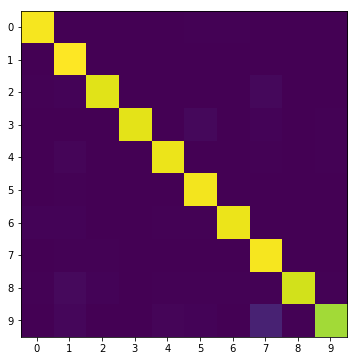

[[0.98 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.01 0.01 0.95 0.   0.   0.   0.   0.02 0.   0.  ]
 [0.   0.   0.   0.96 0.   0.02 0.   0.01 0.   0.  ]
 [0.   0.01 0.   0.   0.97 0.   0.   0.01 0.   0.  ]
 [0.   0.   0.   0.   0.   0.98 0.   0.   0.   0.  ]
 [0.01 0.01 0.   0.   0.   0.01 0.97 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.99 0.   0.  ]
 [0.01 0.02 0.01 0.   0.01 0.01 0.   0.01 0.93 0.01]
 [0.   0.02 0.   0.   0.01 0.01 0.   0.1  0.   0.86]]


In [22]:
# display confusion matrix for your classifier with all the training examples
M = Confusion(testData, testLabels, cnnClassifer)
VisualizeConfusion(M)

* Note that the MLP/ConvNet approaches lead to an accuracy a little higher than the K-NN approach. 
* In general, Neural net approaches lead to significant increase in accuracy, but in this case since the problem is not too hard, the increase in accuracy is not very high.
* However, this is still quite significant considering the fact that the ConvNets we've used are relatively simple while the accuracy achieved using K-NN is with a search over 60,000 training images for every test image.
* You can look at the performance of various machine learning methods on this problem at http://yann.lecun.com/exdb/mnist/
* You can learn more about neural nets/ tensorflow at https://www.tensorflow.org/tutorials/
* You can play with a demo of neural network created by Daniel Smilkov and Shan Carter at https://playground.tensorflow.org/